### Joshua Kim

This will be an exploratory data analysis of the Telecom Customer Churn dataset provided on Kaggle.

This dataset represents the number of Telco customers from the previous month who have either been retained or left the company's services. In this analysis, we will be examining the different factors that affected the churn rate and the inferences that we can draw from the data.

In [59]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data using pandas
file = pd.read_csv(r'C:\Users\Joshua\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert into a pandas dataframe
df = pd.DataFrame(file)

# # Change the column names
# df.columns = ['date_ordered', 'date_returned', 'order_status', 'orders']

# Take a look at the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

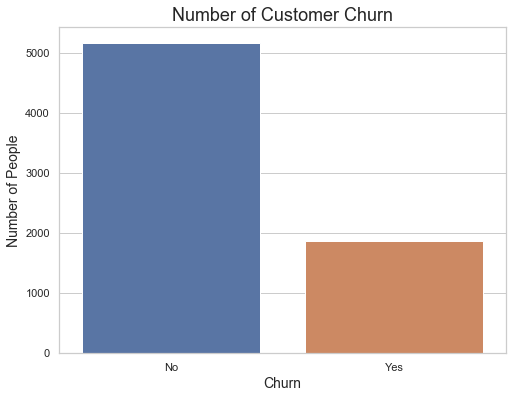

In [76]:
# Let's start the data exploration by looking at how many customers left in the last month
sns.set(style = 'whitegrid')
plt.figure(figsize = (8,6))
sns.countplot(x = 'Churn', data = df)
plt.title('Number of Customer Churn', fontsize = 18)
plt.xlabel('Churn', fontsize = 14)
plt.ylabel('Number of People', fontsize = 14)
plt.savefig(r'C:\Users\Joshua\Downloads\Customer_Churn\Number of Customer Churn', bbox_inches = 'tight')
plt.show()

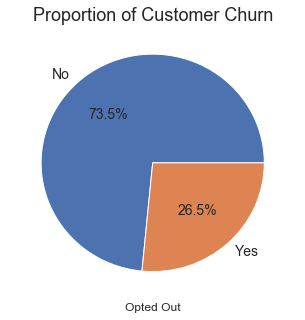

In [80]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 14 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Opted Out',fontsize = 12)
ax.set_ylabel('')
ax.set_title('Proportion of Customer Churn', fontsize = 18)
plt.savefig(r'C:\Users\Joshua\Downloads\Customer_Churn\Proportion of Customer Churn', bbox_inches = 'tight')

As we can see, the majority of customers (72.4%) did not leave the company in the previous while 27.6% were not retained.

Now let's take a look at some of the different factors that affected whether or not a customer stayed with the company.

In [7]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


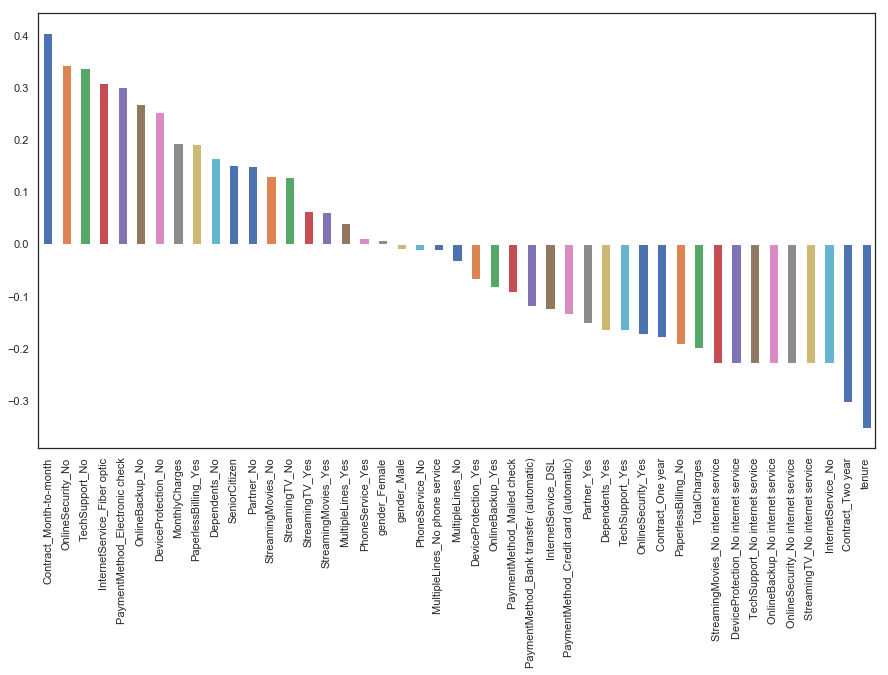

In [13]:
#Get Correlation of "Churn" with other variables:
sns.set(style = 'white')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[1:].plot(kind='bar')

In [14]:
df_dummies.corr()['Churn'].sort_values(ascending = False)[1:6]

Contract_Month-to-month        0.405103
OnlineSecurity_No              0.342637
TechSupport_No                 0.337281
InternetService_Fiber optic    0.308020
Name: Churn, dtype: float64

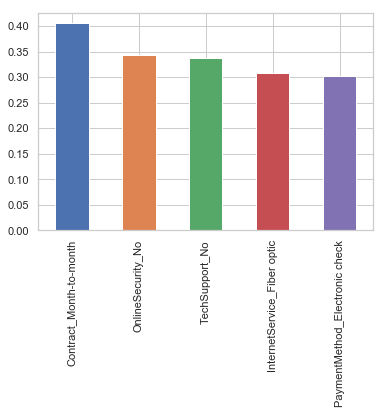

In [81]:
df_dummies.corr()['Churn'].sort_values(ascending = False)[1:6].plot(kind='bar')

In [19]:
df_dummies.corr()['Churn'].sort_values(ascending = False)[-6:-1]

OnlineBackup_No internet service     -0.227890
OnlineSecurity_No internet service   -0.227890
StreamingTV_No internet service      -0.227890
InternetService_No                   -0.227890
Contract_Two year                    -0.302253
Name: Churn, dtype: float64

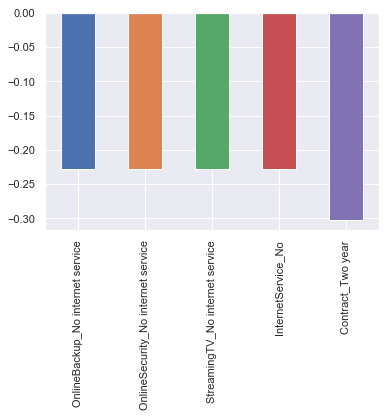

In [83]:
df_dummies.corr()['Churn'].sort_values(ascending = False)[-6:-1].plot(kind='bar')

The top 5 most positively correlated factors with the turnover rate are the month-to-month contract, opting out of online security, opting out of technical support, selecting fiber optic as their internet service and using online payment.

The top 5 most negatively correlated factors are opting out of online backup, opting out of online security, opting out of streaming TV, opting out of internet service and opting for a two-year contract as opposed to month-to-month.

The factors that had the least impact on whether or not a customer drops out are the genders and phone service option.

Let's take a look at each of them.

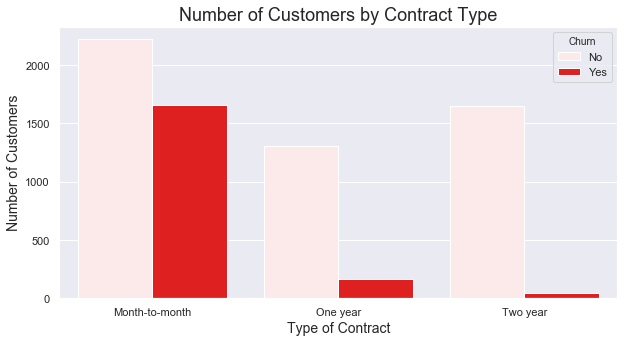

In [82]:
sns.set(style='darkgrid')
plt.figure(figsize = (10,5))
contract_grp = df.groupby('Contract')["Churn"].value_counts()
contract_grp = contract_grp.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
sns.barplot(x='Contract', y= axis_y, hue='Churn', data=contract_grp, color = 'red')
plt.title('Number of Customers by Contract Type', fontsize = 18)
plt.xlabel('Type of Contract', fontsize = 14)
plt.ylabel('Number of Customers',fontsize = 14)
plt.savefig(r'C:\Users\Joshua\Downloads\Customer_Churn\Number of Customers by Contract Type', bbox_inches = 'tight')
plt.show()

As we can see, month-to-month contracts are the most popular type of contract but it also has the most number of people who opted out of the service. In contrast, customers who select yearly contracts are much more likely to be retained. This is likely because they're still under the annual contract which binds them to the company's services until the end of the term.

By promoting and incentivizing annual contracts, the company will be more successful in lowering the churn rate and keeping customers happy.

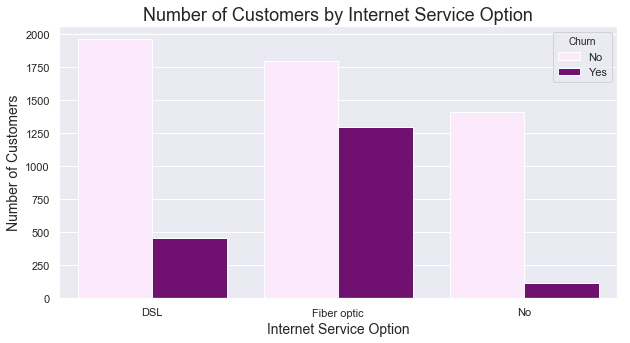

In [86]:
sns.set(style='darkgrid')
plt.figure(figsize = (10,5))
contract_grp = df.groupby('InternetService')["Churn"].value_counts()
contract_grp = contract_grp.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
sns.barplot(x='InternetService', y= axis_y, hue='Churn', data=contract_grp, color = 'purple')
plt.title('Number of Customers by Internet Service Option', fontsize = 18)
plt.xlabel('Internet Service Option', fontsize = 14)
plt.ylabel('Number of Customers',fontsize = 14)
plt.savefig(r'C:\Users\Joshua\Downloads\Customer_Churn\Number of Customers by Internet Service Option', bbox_inches = 'tight')
plt.show()

Customers who select fiber optic - internet service have a much higher chance of leaving the company. 

One suggestion would be to look into the discrepancy between the quality of the fiber-optic service and its price because it is likely that customers felt that this option is overpriced compared to DSL and no internet service.

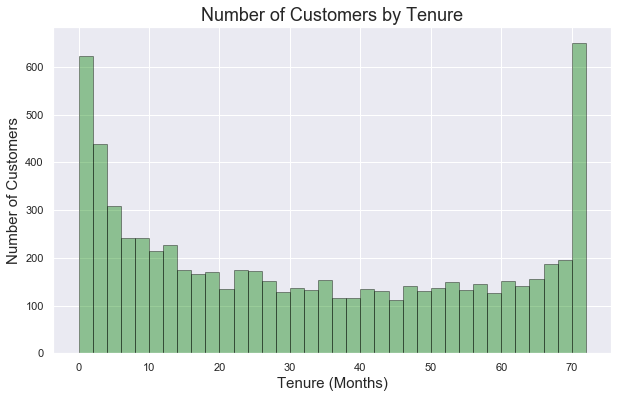

In [107]:
plt.figure(figsize = (10,6))
sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.ylabel('Number of Customers', fontsize = 15)
plt.xlabel('Tenure (Months)', fontsize = 15)
plt.title('Number of Customers by Tenure', fontsize = 18)
plt.savefig(r'C:\Users\Joshua\Downloads\Customer_Churn\Number of Customers by Tenure', bbox_inches = 'tight')
plt.show()

Customers with longer tenure have a much lower churn rate because they prefer to stay with the company in the long-run.

In order to lower the churn rate and retain customers, the company should utilize loyalty/reward programs that incentivize users to stay onboard rather than switching to another company.